In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
from PIL import Image

In [9]:
# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [10]:
training_set = train_datagen.flow_from_directory('C:/Users/K VIGNESHWAR REDDY/Downloads/Tomato/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('C:/Users/K VIGNESHWAR REDDY/Downloads/Tomato/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [11]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [12]:
from tensorflow.keras.regularizers import l2

In [13]:
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))\

# Step 5 - Outer Layer
cnn.add(Dense(10, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='softmax'))
cnn.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [14]:
# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
313/313 [==============================] - 103s 330ms/step - loss: 1.1612 - acc: 0.3707 - val_loss: 1.0750 - val_acc: 0.5730
Epoch 2/15
313/313 [==============================] - 31s 100ms/step - loss: 1.0445 - acc: 0.6576 - val_loss: 1.0337 - val_acc: 0.6730
Epoch 3/15
313/313 [==============================] - 31s 100ms/step - loss: 1.0256 - acc: 0.7050 - val_loss: 1.0269 - val_acc: 0.6910
Epoch 4/15
313/313 [==============================] - 31s 98ms/step - loss: 1.0144 - acc: 0.7317 - val_loss: 1.0314 - val_acc: 0.6770
Epoch 5/15
313/313 [==============================] - 31s 99ms/step - loss: 1.0002 - acc: 0.7694 - val_loss: 1.0322 - val_acc: 0.6640
Epoch 6/15
313/313 [==============================] - 31s 100ms/step - loss: 0.9925 - acc: 0.7871 - val_loss: 1.0158 - val_acc: 0.7160
Epoch 7/15
313/313 [==============================] - 31s 98ms/step - loss: 0.9871 - acc: 0.8023 

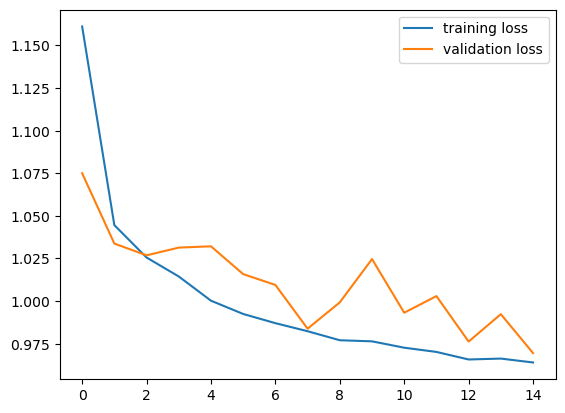

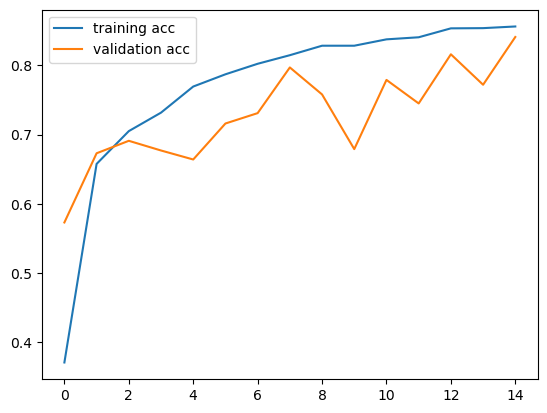

<Figure size 640x480 with 0 Axes>

In [15]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='training loss')
plt.plot(r.history['val_loss'], label='validation loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['acc'], label='training acc')
plt.plot(r.history['val_acc'], label='validation acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
import numpy as np
import pandas as pd
import os
from keras.preprocessing.image import  ImageDataGenerator,img_to_array,load_img,image

Using TensorFlow backend.


In [17]:
# save it as a h5 file

from tensorflow.keras.models import load_model

cnn.save('model_tomato_class.h5')

In [27]:
from tensorflow.keras.models import load_model
 
# load model
model =  tf.keras.models.load_model('model_tomato_class.h5')

In [34]:
def preprocess_images(path):
    img = image.load_img(path, target_size=(64,64))

    img_array = image.img_to_array(img)

    img_array = np.expand_dims(img_array, axis=0)

    img_preprocessed = img_array / 255.0

    return img_preprocessed

In [35]:
import cv2

In [36]:
def predict(img_path):
  t=cv2.imread(img_path)
  plt.imshow(t)

  img = preprocess_images(img_path)
  prediction = model.predict(img)

  predicted_class_index = np.argmax(prediction)

  class_labels = ["Tomato___Bacterial_spot","Tomato___Early_blight","Tomato___Late_blight","Tomato___Leaf_Mold"
                ,"Tomato___Septoria_leaf_spot","Tomato___Spider_mites Two-spotted_spider_mite",
                "Tomato___Target_Spot","Tomato___Tomato_Yellow_Leaf_Curl_Virus","Tomato___Tomato_mosaic_virus",
                "Tomato___healthy"]

  predicted_class_label = class_labels[predicted_class_index]

  print("Predicted class    :   ", predicted_class_label)

Predicted class    :    Tomato___Spider_mites Two-spotted_spider_mite


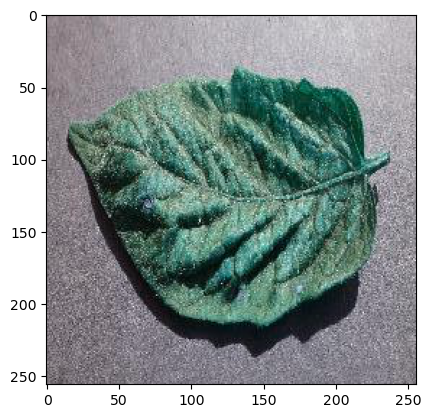

In [37]:
img_path = "C:/Users/K VIGNESHWAR REDDY/Downloads/Tomato/test/Tomato___Spider_mites Two-spotted_spider_mite/1.JPG"
predict(img_path)

Predicted class    :    Tomato___Bacterial_spot


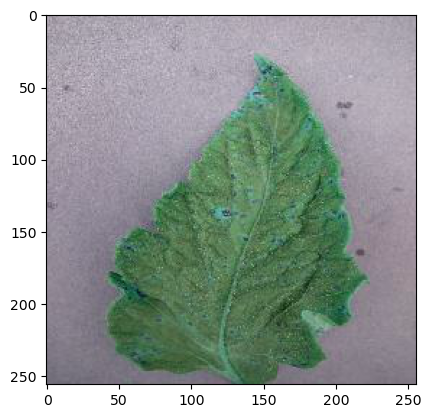

In [38]:
img_path = "C:/Users/K VIGNESHWAR REDDY/Downloads/Tomato/test/Tomato___Septoria_leaf_spot/3.JPG"
predict(img_path)

Predicted class    :    Tomato___healthy


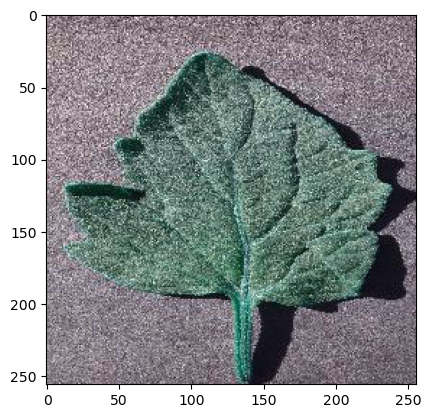

In [39]:
img_path = "C:/Users/K VIGNESHWAR REDDY/Downloads/Tomato/test/Tomato___healthy/2.JPG"
predict(img_path)

Predicted class    :    Tomato___Leaf_Mold


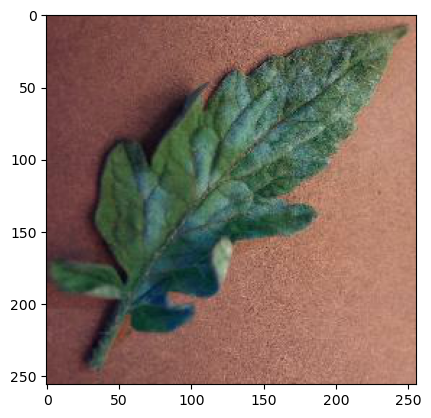

In [40]:
img_path = "C:/Users/K VIGNESHWAR REDDY/Downloads/Tomato/test/Tomato___Leaf_Mold/Tomato___Leaf_Mold_original_0ee63bfa-d01f-4adb-b954-924f271a4d4f___Crnl_L.Mold 9022.JPG_c9629a0c-e36c-4377-8b66-fd3a9c11156a.JPG"
predict(img_path)